Versuch SLE - Bestimmung der spezifischen Ladung eines Elektrons


Erste Aufgabe: Bestimmung der magnetischen Flussdichte:

In [84]:
##David:

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


# B Feld aus Gl 11

# Werte:
d=0.15 #S.20
z1=d/2
z2=-d/2


def B_z(I, z):
    R=0.1475
    N=124
    l=0.025
    mu=sp.constants.mu_0
    B=I*(N*mu)/(2*l)*((z+l/2)/(np.sqrt(R**2+(z+l/2)**2))-(z-l/2)/np.sqrt(R**2+(z-l/2)**2))
    return B


B_ges=B_z(I=5, z=z1)+B_z(I=5, z=z2)
print(B_ges)
#Entspricht den Herstellerangaben

#B Feld aus Hallspannung:
U_hall=(0.2156, 0.2159, 0.2159, 0.2158, 0.2154, 0.2141)
r_hall=(0,      0.01,   0.02,   0.03,   0.04,   0.05)



def B_hall(U_hall):
    eps=(3.125*10**(-3))#Aus S.18 table 4: (typ. sensitivity)| Skalierung wie in der Anleitung beschrieben| V/G
    U_null=2.5 #Volt (Wegen Brückenschaltung irrelevant)
    B_h=(U_hall)/(eps*2) #Gl 21 wird umgestellt.
    return B_h*(10**(-4))#Umrechnung in Tesla

B_h=np.absolute(B_hall(U_hall=U_hall[0]))
print(B_h)
#Funktioniert








0.003741399853782353
0.0034496000000000006


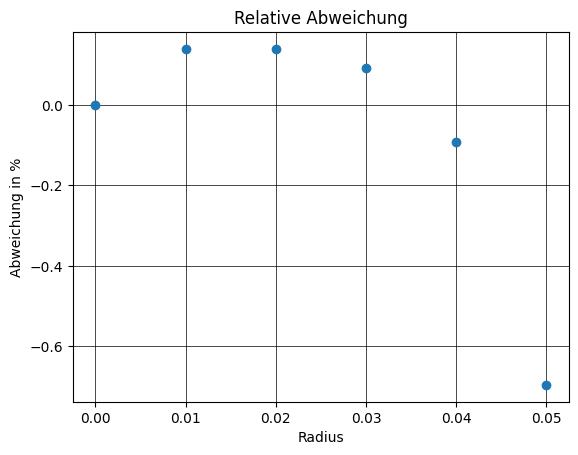

[0.0, 0.13914656771799383, 0.13914656771799383, 0.09276437847865397, -0.09276437847866684, -0.695732838589982]


In [90]:
import matplotlib.pyplot as plt

#Berechnung der relativen Abweichung:
#Hallspannung mit r
U_hall=(0.2156, 0.2159, 0.2159, 0.2158, 0.2154, 0.2141)
r_hall=(     0,   0.01,   0.02,   0.03,   0.04,   0.05)

rel_ab=[]


for i in range(len(U_hall)):
    y=(U_hall[i]-U_hall[0])/U_hall[0]
    rel_ab.append(y*100)

plt.plot(r_hall, rel_ab, linestyle='', marker='o')
plt.grid(visible=True, color='black', linewidth=0.5)
plt.title('Relative Abweichung')
plt.xlabel('Radius')
plt.ylabel('Abweichung in %')
plt.show()

print(rel_ab)






In [86]:

#Berechnung e/m

def B_z(I, z):
    R=0.1475
    N=124
    l=0.025
    mu=sp.constants.mu_0
    B=I*(N*mu)/(2*l)*((z+l/2)/(np.sqrt(R**2+(z+l/2)**2))-(z-l/2)/np.sqrt(R**2+(z-l/2)**2))
    return B


d=0.08 #Durchmesser in Metern
U_B=295.7 #Beschleunigungsspannung in Volt
B_z=(B_z(I=1.57, z=z1)+B_z(I=1.57, z=z2))*(1-rel_ab[4]/100) #B-Feld im Moment aus Gl. 11



def spez_lad(U_B, B_z, d):
    em=(2*U_B)/(((B_z)**2)*((d/2)**2))
    return em

em=spez_lad(U_B=U_B, d=d, B_z=B_z)


print(em)
print(em*10**-11)



267318135822.6302
2.6731813582263015


In [87]:
## Fehlerrechnung für das Bfeld mit Gl.9:
import sympy as smp


def DELTA_B(I_val, delI_val, d_val, deld_val, R_val, delR_val, N_val, relab_val, delrelab_val):
    I, d, R, N, mu, relab=smp.symbols('I d R N mu relab')
    delt_I, delt_d, delt_R, delt_relab=smp.symbols('delt_I delt_d delt_R delt_relab')
    B1=I*(N*mu*(R)**2)/((R**2+(d/2)**2)**(3/2))
    B2=I*(N*mu*R**2)/((R**2-(d/2)**2)**(3/2))
    B=(B1+B2)*(1-relab)
    
    part_I=smp.diff(B, I)
    part_R=smp.diff(B, R)
    part_d=smp.diff(B, d)
    part_relab=smp.diff(B, relab)

    delt_B=smp.sqrt((part_I*delt_I)**2+(part_R*delt_R)**2+(part_d*delt_d)**2+(part_relab*delt_relab)**2)

    B_val=delt_B.subs(I, I_val).subs(delt_I, delI_val).subs(d, d_val).subs(delt_d, deld_val).subs(R, R_val).subs(delt_R, delR_val).subs(N, N_val).subs(relab, relab_val).subs(delt_relab, delrelab_val).subs(mu, 1.25663706212*10**-6)
    return B_val

error_Bz = DELTA_B(I_val=1.57, delI_val=90*10**-3, d_val=150*10**-3, deld_val=5*10**-3, R_val=147.5*10**-3, delR_val=5*10**-3, N_val=124, relab_val=-0.09276437847866684, delrelab_val =0)
print(error_Bz)


0.000326719888718966


In [88]:
#Fehlerrechnung für e/m

def DELTA_spez_lad(U_val, delt_U_val, B_z_val, delt_B_z_val , r_val, delt_r_val): #U ist Beschleunigung, B_z ist Feld, r ist Radius der Bahn
    U, B_z, r=smp.symbols('U B_z r')
    delt_U, delt_B_z, delt_r=smp.symbols('delt_U delt_B_z delt_r')
    em=(2*U)/((B_z**2)*(r**2))
    part_U=smp.diff(em, U)
    part_B_z=smp.diff(em, B_z)
    part_r=smp.diff(em, r)
    delta_em=smp.sqrt((part_U*delt_U)**2+(part_B_z*delt_B_z)**2+(part_r*delt_r)**2)
    delta_em_val=delta_em.subs(U, U_val).subs(delt_U, delt_U_val).subs(B_z, B_z_val).subs(delt_B_z, delt_B_z_val).subs(r, r_val).subs(delt_r, delt_r_val)

    return delta_em_val

error_em=DELTA_spez_lad(U_val=295.7, delt_U_val=0.44785, B_z_val=0.003741399853782353, delt_B_z_val=0.000326719888718966, r_val=0.04, delt_r_val=0.02)

print(error_em)
print(f"{error_em*10**-11} *10**11")

26805147796.1480
0.268051477961480 *10**11


0.0005 * 295.7 = 0.14785 V Fehler Messgerät

Fehler Digits: 3 * 100*10**-3 = 300 mV

Gesamtfehler: +- 0.44785 V